# Decision Tree Ensembles Project

## Introduction

The goal of this machine learning project is to predict the species of iris flowers based on their sepal length, sepal width, petal length and petal width. The Iris dataset, which is a well-known dataset available in Python's scikit-learn library, will be used for this classification task. We aim to explore and compare the performance of three different algorithms: Decision Tree, Random Forest, and AdaBoost, to identify the most suitable model for this classification problem.

## Project Goals

* Build and train machine learning models to classify iris flowers into three species: setosa, versicolor, and virginica.
* Evaludate the performance of each model using appropriate metrics.
* Determine which algorithm performs best for this particular dataset.

## Import Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris

In [3]:
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = pd.DataFrame(iris_data.target, columns=['class'])

## Model Training

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
y_train = y_train.values.ravel()

In [7]:
decision_tree_model = DecisionTreeClassifier(max_depth=4)
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=4)
adaboost_model = AdaBoostClassifier(n_estimators=100)

In [8]:
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

## Model Evaluation

In [9]:
dt_predictions = decision_tree_model.predict(X_test)
rf_predictions = random_forest_model.predict(X_test)
adaboost_predctions = adaboost_model.predict(X_test)

In [14]:
print(f"Decision Tree Model Accuracy: {decision_tree_model.score(X_test, y_test)}")
print(f"Random Forest Model Accuracy: {random_forest_model.score(X_test, y_test)}")
print(f"AdaBoost Model Accuracy: {adaboost_model.score(X_test, y_test)}")

Decision Tree Model Accuracy: 0.9
Random Forest Model Accuracy: 0.9
AdaBoost Model Accuracy: 0.8666666666666667


In [15]:
print(f"Decision Tree Model Confusion Matrix: {confusion_matrix(y_test, dt_predictions)}")
print(f"Random Forest Model Confusion Matrix: {confusion_matrix(y_test, rf_predictions)}")
print(f"AdaBoost Model Confusion Matrix: {confusion_matrix(y_test, adaboost_predictions)}")

NameError: name 'confusion_matrix' is not defined

In [49]:
importances = decision_tree_model.feature_importances_

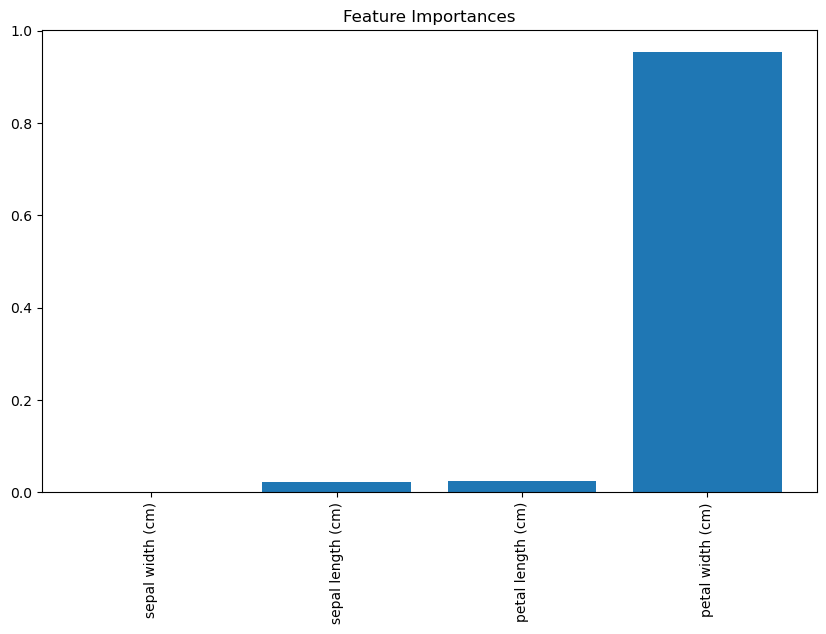

In [50]:
indicies_sorted = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indicies_sorted])
plt.xticks(range(len(importances)), X.columns[indicies_sorted], rotation=90)
plt.show()

### 2) Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=4)

In [52]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [53]:
random_forest_model.predict(X_test)

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [54]:
random_forest_model.score(X_test, y_test)

0.9

In [55]:
importances = random_forest_model.feature_importances_

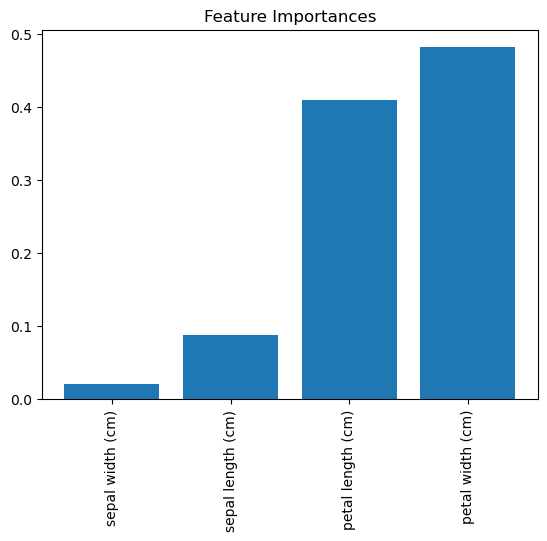

In [56]:
indicies_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indicies_sorted])
plt.xticks(range(len(importances)), X.columns[indicies_sorted], rotation=90)
plt.show()

### 3) AdaBoost

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [57]:
adaboost_model = AdaBoostClassifier(n_estimators=100)

In [58]:
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [59]:
adaboost_model.predict(X_test)

array([1, 1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [60]:
adaboost_model.score(X_test, y_test)

0.8666666666666667

In [61]:
importances = adaboost_model.feature_importances_

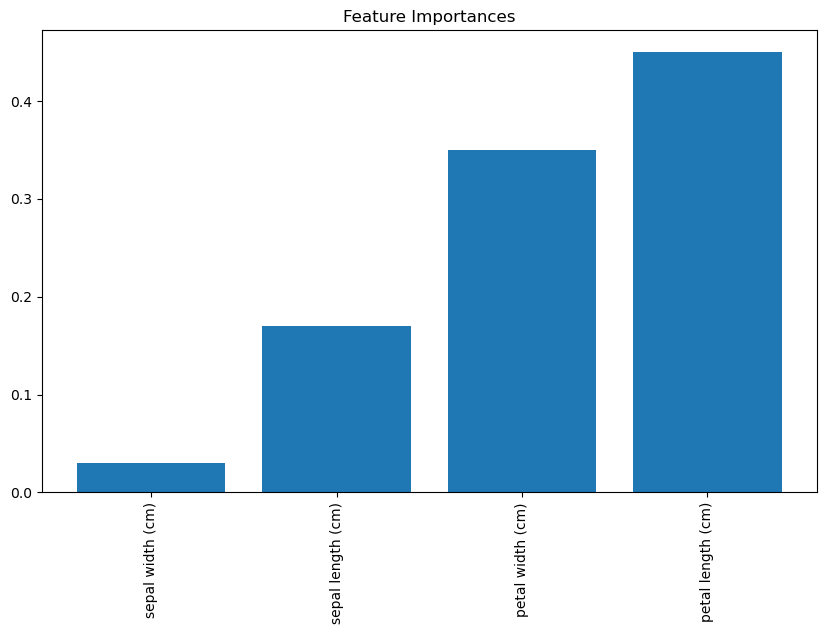

In [62]:
indicies_sorted = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indicies_sorted])
plt.xticks(range(len(importances)), X.columns[indicies_sorted], rotation=90)
plt.show()

## Model Evaluation